<a href="https://colab.research.google.com/github/sakibchowdhury131/railcop/blob/main/tinyML_pipeLine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.4 kB/s 
     |████████████████████████████████| 3.0 MB 38.4 MB/s 
     |████████████████████████████████| 454 kB 39.4 MB/s 
     |████████████████████████████████| 2.9 MB 35.9 MB/s 


In [ ]:
import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

In [ ]:
import os
from tensorflow import keras
import matplotlib.pyplot as plt
import math

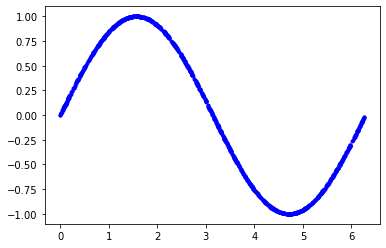

In [ ]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

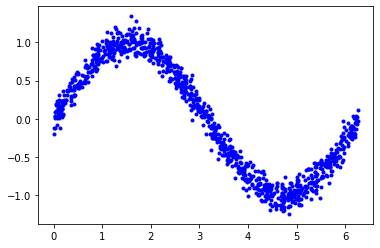

In [ ]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

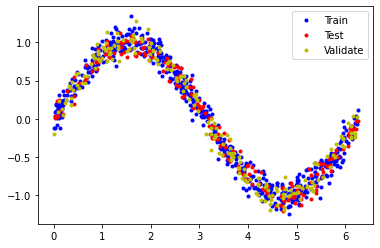

In [ ]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

In [ ]:
model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=500, batch_size=64,
                    validation_data=(x_validate, y_validate))

Epoch 1/500
10/10 [==============================] - 0s 24ms/step - loss: 0.6834 - mae: 0.7333 - val_loss: 0.5412 - val_mae: 0.6609
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 0.4666 - mae: 0.6007 - val_loss: 0.4645 - val_mae: 0.5874
Epoch 3/500
10/10 [==============================] - 0s 17ms/step - loss: 0.4398 - mae: 0.5616 - val_loss: 0.4478 - val_mae: 0.5724
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4226 - mae: 0.5469 - val_loss: 0.4266 - val_mae: 0.5610
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4011 - mae: 0.5373 - val_loss: 0.4085 - val_mae: 0.5519
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: 0.3841 - mae: 0.5304 - val_loss: 0.3925 - val_mae: 0.5430
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: 0.3680 - mae: 0.5197 - val_loss: 0.3759 - val_mae: 0.5318
Epoch 8/500
10/10 [==============================] - 0s 7ms/step - loss: 0.3520 -

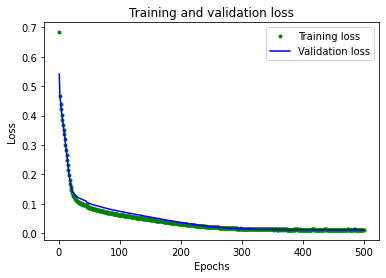

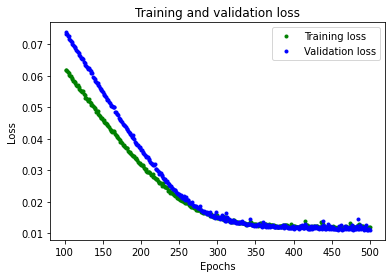

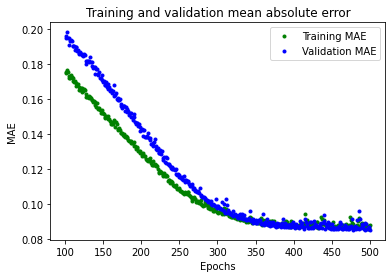

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 3ms/step - loss: 0.0108 - mae: 0.0836


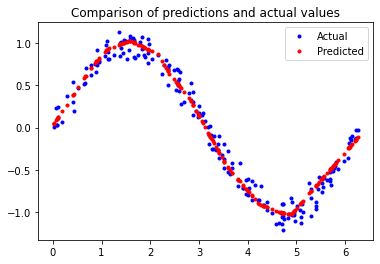

In [ ]:
# Calculate and print the loss on our test dataset
loss = model.evaluate(x_test, y_test)

# Make predictions based on our test dataset
predictions = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [ ]:
W1, b1 = model.layers[0].get_weights()
W2, b2 = model.layers[1].get_weights()
W3, b3 = model.layers[2].get_weights()

In [ ]:
print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(W3.shape, b3.shape)

(1, 16) (16,)
(16, 16) (16,)
(16, 1) (1,)


In [ ]:
xs = x_test

In [ ]:
# This is what the TF model does internally:
ys = []
for x in xs:
    x = np.array([x])       # x should be array
    h1 = x @ W1 + b1        # dense layer
    h1 = np.maximum(0, h1)  # ReLU
    h2 = h1 @ W2 + b2       # dense layer
    h2 = np.maximum(0, h2)  # ReLU
    h3 = h2 @ W3 + b3       # dense layer
    ys.append(h3)

ys = np.stack(ys)

In [ ]:
# Are our predictions the same as TF's predictions?
# This should print 0 if the results are close enough.
np.sum(np.abs(ys - predictions) > 1e-6)

0

In [ ]:
# Note that we transpose W2. This makes the inner loop for the
# matrix multiplication a little simpler.

names = ["W1_data", "b1_data", "W2_data", "b2_data", "W3_data", "b3_data"]
arrays = [W1, b1, W2.T, b2, W3, b3]

In [ ]:
# Copy this into model_data.cpp:

for name, array in zip(names, arrays):
    print("const float %s[] PROGMEM = {" % name)
    print("   ", ", ".join([str(x) + "f" for x in array.flatten()]))
    print("};\n")

const float W1_data[] PROGMEM = {
    -0.39788383f, 0.46269524f, 0.37118372f, -0.07777083f, -0.2472133f, 0.1299194f, 0.6088688f, -0.07711333f, 0.3258779f, 0.10179701f, 0.06892308f, 0.14545888f, 0.5019393f, 0.18220845f, -0.007467677f, -0.5632218f
};

const float b1_data[] PROGMEM = {
    0.0f, 0.47711065f, -1.0374674f, 0.0f, 0.0f, 0.016759895f, -0.62990725f, 0.0f, -0.36283347f, 0.34145048f, 0.78814906f, 0.13918991f, 0.07409394f, -0.14473496f, 0.37450573f, 0.0f
};

const float W2_data[] PROGMEM = {
    0.008752942f, 0.101518355f, -0.553811f, -0.38656723f, 0.026203513f, 0.38166463f, -0.2688664f, 0.22883019f, -0.5420527f, 0.30996644f, 0.21137182f, -0.29747948f, 0.16783933f, 0.08749505f, 0.4966967f, 0.26714543f, -0.04890293f, 0.2296046f, 1.0528171f, -0.13226247f, 0.36876526f, -0.4761027f, 0.013925359f, 0.19773671f, 0.13194467f, 0.099613436f, -0.2859833f, -0.29654026f, 0.22439128f, -0.15724003f, -0.44684064f, -0.26854938f, -0.079212666f, -0.0605688f, 0.201645f, 0.033375174f, 0.41258594f, 0.3